# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusion](#Conclusion)




<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.



<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [112]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


>**Tip**: Please save your work regularly.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [113]:
# creat dataframe by reading the csv files 
df=pd.read_csv('ab_data.csv')

# show the first 5 rows
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [114]:
# check the shape of the data frame df

df.shape

(294478, 5)

**c.** The number of unique users in the dataset.

In [115]:
# find the unique in the dataset 

df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

**d.** The proportion of users converted.

In [116]:
# find the proportion of users converted 


# make a query to find the the unique users that have a converted number as "1"
# and divide it by the total shape of the dataframe df

df.query('converted == "1"').user_id.nunique() / df.shape[0]

0.1194418598333322

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [117]:
# make a group by of the column "group" and "landing_page" 
# and count the dataset 

df.groupby(['group', 'landing_page']).count()

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

In [118]:
# sum the number of rows that column group does not match
# with the corresponding "landing_page" 

# find 'treatment' does not match with "new_page "
# and 'control' does not match with 'old_page'

df.query("group == 'treatment' and landing_page != 'new_page'").shape[0] + df.query("group == 'control' and landing_page != 'old_page'").shape[0]

3893

**f.** Do any of the rows have missing values?

In [119]:
# find missing values in the dataset df

df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  



In [120]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2=df.query("group == 'treatment' and landing_page == 'new_page' or group == 'control' and landing_page == 'old_page'")

In [121]:
# find the shape of the new dataframe df2

df2.shape[0]

290585

In [122]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

###  1.3  


**a.** How many unique **user_id**s are in **df2**?

In [123]:
# find the unique data in the 'df2' data frame

df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [124]:
# find the duplicate in the column '  user_id '

duplicate = df2[df2.duplicated('user_id')]

# show the result of the duplicate user
duplicate

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [125]:
# get all the index that match the user_id = '773192'
duplicate_index= df2[df2['user_id'] == 773192].index

In [126]:
# locate the duplicate rows with match the user_id = '773192'
duplicate_rows = df.iloc[duplicate_index]

#check reslut 
duplicate_rows

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [127]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2.drop(duplicate_index[0], inplace = True )

# Check again if the row with a duplicate user_id is deleted or not
df2[df2['user_id'] == 773192].index

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Int64Index([2893], dtype='int64')

###  1.4  


**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>




In [128]:
# # proportion of individuals who have converted

p_population= df2.converted.mean()
p_population

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [129]:
# proportion of individual was in the `control` group who have converted

CR_control = (df2.query('group=="control"')['converted']).mean()
CR_control

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [130]:
# proportion of individual was in the `treatment` group who have converted

CR_treatment= (df2.query('group=="treatment"')['converted']).mean()
CR_treatment

0.11880806551510564

In [131]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff=CR_treatment- CR_control
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [132]:
# proportion of individuals who can recieve new page

(df2.landing_page == "new_page").sum()/df2.shape[0]

0.50006194422266881

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>As we have watched that the Conversion Rate in "control" (12%) was higher than the Conversion Rate from "treatment" (11.8%) and in the diffrence btween the two conversion rates (CR_treatment-CR_control) the number was negative ,meaning that the old page have a higher leads to more conversions than the new page.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


###  2.1
For now, consider you need to make the decision just based on all the data provided.  



If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

>$$H_0: P_{old} \ge P_{new}  $$


$$H_1: P_{old} < P_{new} 	 $$ 

<br> OR


>$$H_0: P_{old} - P_{new} \ge 0$$


$$H_1: P_{old} - P_{new} 	< 0$$

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>


**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [133]:
# set p_new under the null hypothesis that is equal to p_population 

p_new=p_population
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [134]:
# set p_old under the null hypothesis that is equal to p_population 

p_old=p_population
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>


In [135]:
# set the number of individuals in the treatment group by setting the number of new_page in landing_page

n_new=(df2.landing_page == "new_page").sum()
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [136]:
# set the number of individuals in the control group by setting the number of old_page in landing_page

n_old=(df2.landing_page == "old_page").sum()
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>


In [137]:
# Simulate a Sample for the treatment Group
# size = n_new
# data is array of [1,0]

new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
new_page_converted.mean()

0.12087261716330604

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [138]:
# Simulate a Sample for the control Group
# size = n_new
# data is array of [1,0]

old_page_converted = np.random.choice([1, 0], size=n_new, p=[p_old, (1-p_old)])
old_page_converted.mean()

0.11917280297295438

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [139]:
# diffrence btween the mean of new_page_converted and the mean of old_page_converted

new_page_converted.mean()-old_page_converted.mean()

0.0016998141903516589


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [140]:
# Sampling distribution  by run simulation for 10000 times using same process

p_diffs = []
size=df2.shape[0]

for _ in range (10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
    old_page_converted = np.random.choice([1, 0], size=n_new, p=[p_old, (1-p_old)])
    p_diffs.append(new_page_converted.mean()-old_page_converted.mean())

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  <br><br>

  



In [141]:
# Convert to numpy array
p_diffs = np.array(p_diffs)

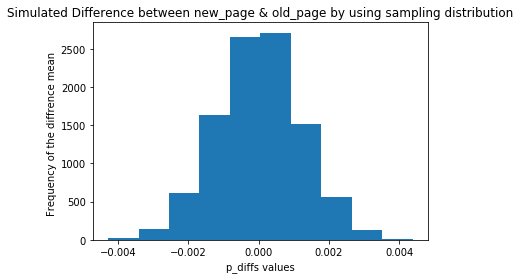

In [142]:
# Plot sampling distribution
plt.hist(p_diffs)

#set xlabel ,ylabel , axvline,title 
plt.xlabel('p_diffs values')
plt.ylabel('Frequency of the diffrence mean ')
plt.title('Simulated Difference between new_page & old_page by using sampling distribution');

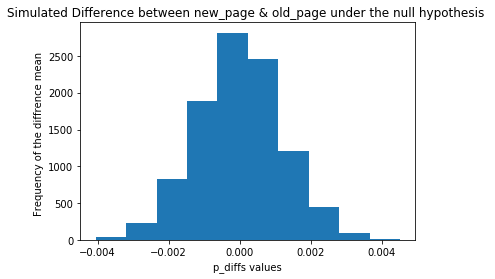

In [143]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0 ,p_diffs.std(),p_diffs.size)

# Plot the null distribution
plt.hist(null_vals)

#set xlabel ,ylabel , axvline,title 
plt.xlabel('p_diffs values')
plt.ylabel('Frequency of the diffrence mean ')
plt.title('Simulated Difference between new_page & old_page under the null hypothesis ');

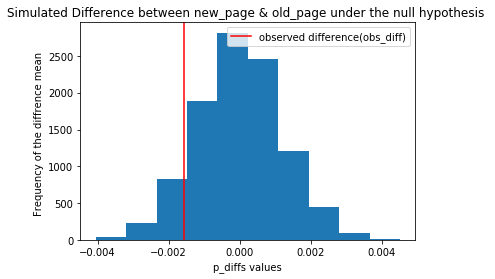

In [144]:
# Plot observed statistic with the null distibution
plt.hist(null_vals)

#set xlabel ,ylabel , axvline,title ,legend
plt.xlabel('p_diffs values')
plt.ylabel('Frequency of the diffrence mean ')
plt.axvline(obs_diff, c='red',label="observed difference(obs_diff)")
plt.title('Simulated Difference between new_page & old_page under the null hypothesis ')
plt.legend()
plt.show();

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [145]:
# Compute p-value
(null_vals>obs_diff).mean()

0.90569999999999995

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

> what we have computed in the part j is called a P-value and we can understand it as how likely it is that our data could have occurred under the null hypothesis, and the propabilty value(P-value) is 90% which is more greater than the alpha (type 1 error ) so we fail to reject the null Hypothesis beacuse it is 90% more likely to accure under the null hypothesis .



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [146]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = len(df2.query('landing_page == "old_page" & converted == 1'))

# number of conversions with the new_page
convert_new =len(df2.query('landing_page == "new_page" & converted == 1'))

# number of individuals who were shown the old_page
n_old = (df2.landing_page == "old_page").sum()

# number of individuals who received new_page
n_new = (df2.landing_page == "new_page").sum()

In [147]:
#check the output
convert_old , convert_new , n_old , n_new

(17489, 17264, 145274, 145310)

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.

>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 




Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

>**Tip**: You don't have to dive deeper into z-test for this exercise. **Try having an overview of what does z-score signify in general.** 

In [148]:
import statsmodels.api as sm
# sm.stats.proportions_ztest() method arguments
# It's a left-tailed

z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>



> the p-value, or probability value, tells you how likely it is that your data could have occurred under the null hypothesis. z-score indicates how far away from the mean it is or more meaning that tge z-score measures the distance between a data point and the mean using standard deviations.


> since the P-value is 0.9 greater that the alfa (type 1 error )(0.05) so we fail to reject the null hypothesis. And the p-value from the z-test is the same with the Sampling distribution test.

> SO we can find from the P-value that is  90% more likely that the converted rate from the old page be equal or greater that the converted rate from the new pages .

> since the z-score is 1.3 that indicates that the data point falls 1.3 standard deviations above the mean.

> we notice also that the z-score (1.3) is less than the z-alfa(1.645) so it come to reject the null , but since the p-value fail to reject the null so that is more significant than the z-score .

<a id='regression'></a>
### Part III - A regression approach

###  3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

> Since this is an only two possible outcome for yes or no (conversion or no conversion ) so we will use __Logistic regression__

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [149]:
#creating intercept column in the df2 dataframe
df2['intercept']=1

# make dummies for control and treatment
df2[['control','treatment']]=pd.get_dummies(df2['group'])

#check top 5 rows from the df2
df2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


in the next step will rename the "treatment" column to be "ab_page"

In [150]:
#rename the 'treatment' column into ab_page
df2=df2.rename(columns={'treatment': 'ab_page'})

# drop "control" column 
df2=df2.drop('control', axis=1)

#check dataframe
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [151]:
# importing the statsmodels 
import statsmodels.api as sm

# use the logit model from the statsmodels
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [152]:
# fit the result
results = log_mod.fit()

# creat a summary 
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-04-11 23:34 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  




>the p-value of the ab_page is 0.1899 

> we used the null hypothese in regression as the same in sampling distribution is that the null hypothesis is that the conversion from old page is equal or highter than the conversion from new pages 

> We can see that the hypothesis in sampling distrubition are one tailed as in Part II but in the regression (Part III) it is two tailed (as it is defined in the documantion of the statsmodels.discrete.discrete_model.LogitResults 

> so we can see why the p value from Part II diffrent from the p value in Part III because the first is one tailed and the second is two tailed.

> Since the P-value is 0.1899 which is greater than the alfa( Type I error rate (0.05)) so we reject to fail the null hypotheses (the same as we reject the null in the last parts too )

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> it is important to add more factors into our regression so we can see if there is any correlation or any influences on the conversion rate and for sure it can give us more accuracy in our prediction 

> the disadvantage we can have Adding more and more variables makes it more and more likely that you will overfit your model to the training data. This can result in a model that is making up trends that don't really exist just to force the model to match the points that do exist 

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 


 Provide the statistical output as well as a written response to answer this question.

In [153]:
# Read the countries.csv
df_countries=pd.read_csv('countries.csv')

In [154]:
# Join with the df2 dataframe
df_merged= df_countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')

# check dataframe
df_merged.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [155]:
# Create the necessary dummy variables
df_merged[['UK', 'US', 'CA']] = pd.get_dummies(df_merged['country'])

#check dataframe
df_merged.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [156]:
# find the convertion rate for the diffrent countries

df_merged.groupby(['country'], as_index=False).mean()

,country,converted,intercept,ab_page,UK,US,CA
0,CA,0.115318,1.0,0.503552,1.0,0.0,0.0
1,UK,0.120594,1.0,0.498247,0.0,1.0,0.0
2,US,0.119547,1.0,0.500459,0.0,0.0,1.0


In [157]:
# find the convertion rate for the diffrent landing pages 
# as result in "ab_page" refer to '0'= control and '1'= treatment

df_merged.groupby(['ab_page'], as_index=False).mean()

,ab_page,converted,intercept,UK,US,CA
0,0,0.120386,1.0,0.049548,0.250286,0.700167
1,1,0.118808,1.0,0.050244,0.248476,0.701280


in the above steps we have computed the conversion rate for landing pages and for the three countries separately , but this dont give us if their is any relation btween them and the conversion rate so we can reliable on our prediction .<br>

now in the next step we will see if the three countries have an impact on conversion . 

In [158]:
# Fit model, and summarize the results

# use the logit model from the statsmodels
log_mod = sm.Logit(df_merged['converted'], df_merged[['intercept','ab_page','UK','US']])

# fit the result
results = log_mod.fit()

# creat a summary 
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-04-11 23:34 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
UK           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
US            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

> by looking at this summary we can see that the two countries "UK" and "US" and also the "ab_page" (the landing page as treatment) are NOT STATISTICALLY SIGNIFICANT that mean there have no influence on the conversion rate beacuse their p-values are above the Type I error rate (0.05) .

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion. 




Now we will interact the countries with the "ab_page" (landing page as new page) , and we will get this by multipling each country column with the 'ab_page' column  

In [159]:
# finding the interaction between "UK" and the "ab_page"
df_merged['uk_ab_page'] = df_merged.UK *df_merged.ab_page

# finding the interaction between "US" and the "ab_page"
df_merged['us_ab_page'] = df_merged.US *df_merged.ab_page

#check dataframe
df_merged.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,CA,uk_ab_page,us_ab_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1


in the next step we will use statsmodels to fit the regression model to get a summary to see if the country interact with landing page have significant effects on conversion

In [160]:
# Fit model, and summarize the results

# use the logit model from the statsmodels
log_mod = sm.Logit(df_merged['converted'], df_merged[['intercept','ab_page','UK','US','uk_ab_page','us_ab_page']])

# fit the result
results = log_mod.fit()

# creat a summary 
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-04-11 23:34 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
UK           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
US           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
uk_ab_page   -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
us_ab_page    0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
==================================================================

"""

> from the previous summary we can get that the p_values for both the interaction "uk_ab_page" (0.38) & "us_ab_page" (0.23) have no effect on the convertion beacuse their are greater than the Type I error rate (0.05).  That mean that the landing page in the diffrent countries have no effect on the convertion.

> and for sure we fail to reject the null hypotheses from this regression tests 

<a id='Conclusion'></a>
## Conclusion

In conclusion we can say from the diffrents test we have made(the propabilty and A/B testing by sampling distrubution and Z-test and by using Regression ) that all have united that we fail to reject the null hypotheses which mean that there is no prove that the new page will be better and do the same or more converion than the old page , sofare the old page is doing better as we see from this previous test and summary.
<br>

As  Lin, Lucas, and Shmueli (2013) considered sample sizes over 10,000 cases to be large and our data shape is (294478) , so tere is no need to continue testing and gathering data .
<br>

We can propose to create an alternative new page than this one , or develop a new page that can convert more people and we can test it later to see if the alternative new page have reject the null or not ,but now this new page that we have tested have to be changed.

In [163]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0